# Lecture 5 - K Means Clustering
![Course Logo.PNG](Images/Course Logo.PNG)

<a href="Images/You are being tracked.mp4"> <b><h1> اضغط هنا</h1></b> </a>

![K Means Shaorma.gif](Images/K Means Shaorma.gif)

![Clustering Applications.PNG](Images/Clustering Applications.PNG)

![RunyanKmeans.gif](Images/RunyanKmeans.gif)

![What is Clustering.png](Images/What is Clustering.png)

:لقد أنهينا لتونا العديد من الخوارزميات و المواضيع الأساسية الواجب على كل شخص الإلمام بها و مما قمنا بإتمامه
* Gradient Descent Optimization Algorithm
* Linear Regression with One/Multi Variables
* Logistic regression
* Neural Networks and Back Propagation

#### (Labelled Data)و كما نعلم فإن جميع الطرق السابق ذكرها تتعامل مع البيانات المبوبة
#### و هنا يظهر السؤال الغاية في الأهمية ألا و هو كيف لنا أن نتعامل مع البيانات غير المبوبة
#### ؟(Unlabelled Data)

##  Unsupervised Learning مدخل إلى 
![Supervised and Unsupervised Learning.jpg](Images/Supervised and Unsupervised Learning.jpg)

    Supervised Learning                              Unsupervised Learning
    • More accurate                                  • Less accurate
    • Labeled data required                          • No labeled data required
    • Requires human in the loop                     • Minimal human effort

### K Means Clustering Algorithm
![KMeans Alg Steps.jpg](Images/KMeans Alg Steps.jpg)
![RunyanKmeans.gif](Images/RunyanKmeans.gif)

Given  k , the K-means algorithm works as follows:
1. Randomly choose  k  data points (seeds) to be the initial centroids
2. Assign each data point to the closest centroid
![Mooove!.png](Images/Mooove!.png)
3. Re-compute (update) the centroids using the current cluster memberships
4. If a convergence criterion is not met, go to step 2

بإمكاننا أيضاً إيقاف تنفيذ الخوارزمية من أجل عدد محدد من التكرارات. يجب الانتباه إلى أن الخوارزمية حساسة لكيفية توزع البيانات لذلك من الجيد تنفيذ الخوارزمية عدة مرات من أجل مراكز 
عشوائية مختلفة و من ثم نقوم بإيجاد المتوسط الحسابي لهذه النقط و نعيد تنفيذ الخوارزمية للمرة الأخيرة من أجل المراكز الجديدة الناتجة للتحقق من عمل الخوارزمية

؟Kكيف يمكننا إيجاد أفضل قيمة من أجل 
Kحتى الآن لا يوجد أي طريقة أمثلية لتحديد عدد العناقيد(المجموعات),لذلك إذا كان لدينا فكرة أو القدرة على تخمين عدد المجموعات عندها تكون هذه القيمة هي قيمة 

Elbow method من الطرق التي يمكن استخدامها أيضا هي طريقة المرفق
![Elbow method.PNG](Images/Elbow method.PNG)
بالاعتماد على هذه الطريقة فإن أفضل عدد مجموعات يمكن اختياره هو الذي تحدده نقطة المرفق, على كل حال بالحياة العملية غالباً لا يمكننا الاعتماد على هذه الطريقة لأن المنحني غالبا ما يكون أقرب للمنحني الظاهر على الشكل الأيمن من الصورة السابقة, لذلك من الأفضل لتحديد عدد المجموعات هو الاستفسار من الزبون عن عدد المجموعات التي يرغب بالحصول عليها لحل مشكلته كما في المثال التالي
![T-shirt sizing example.PNG](Images/T-shirt sizing example.PNG)

## When should I use K Means?

- Your data is numeric. It doesn't work with categorical features. We're computing the distance between real numbers!
- If you don't have labels for your data
- K-means is the simplest. To implement and to run. All you need to do is choose "k" and run it a number of times.
- K-means and other clustering algorithms shine when you have multivariate data. They will "work" with 1-dimensional data, but they are not very smart anymore.
- useful when you have an idea of how many clusters actually exists in your space. 

![MNIST](Images/mnist.png)

In [140]:
import random
from base64 import b64decode
from json import loads
#matrix math
import numpy as np
#graphing
import matplotlib.pyplot as plt
#graphing animation
import matplotlib.animation as animation

import pandas
from time import time
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


# set matplotlib to display all plots inline with the notebook
%matplotlib inline

In [197]:
np.random.seed(42)

mnist_digits = load_digits()
data = scale(mnist_digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(mnist_digits.target))
labels = mnist_digits.target

sample_size = 300

In [198]:
print(mnist_digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [199]:
print(mnist_digits.data[170], '\n', mnist_digits.target[170])

[  0.   0.   2.  13.   4.   0.   0.   0.   0.   0.   8.  14.  11.   0.   0.
   0.   0.   0.  10.   6.  14.   5.   2.   0.   0.   0.   2.  14.  12.  14.
   0.   0.   0.   0.   1.  15.  13.   2.   0.   0.   0.   0.  11.  13.  14.
   1.   0.   0.   0.   0.  13.   8.  10.   4.   0.   0.   0.   0.   2.  11.
  16.   7.   0.   0.] 
 8


In [200]:
data[170]

array([ 0.        , -0.33501649, -0.67419451,  0.27407152, -1.83101336,
       -1.02065685, -0.40972392, -0.12502292, -0.05907756, -0.62400926,
       -0.43954376,  0.50814096,  0.1507201 , -1.35109507, -0.51499146,
       -0.13043338, -0.04462507, -0.72764628,  0.01701967, -0.17113561,
        1.11792159, -0.45295777,  0.06488677, -0.11422184, -0.03337973,
       -0.78510524, -1.14554164,  0.88052498,  0.33703592,  1.09838387,
       -0.62889588, -0.04723238,  0.        , -0.67237227, -1.05445197,
        0.94599454,  0.45489876, -1.14908874, -0.82269451,  0.        ,
       -0.06134367, -0.5312841 ,  0.63011714,  0.8963065 ,  1.01118593,
       -1.27091315, -0.79827225, -0.08874162, -0.03543326, -0.40357499,
        0.97343907, -0.29456207,  0.11012973, -0.78920396, -0.75743581,
       -0.20978513, -0.02359646, -0.29908135, -0.69734916, -0.24900951,
        0.84963214,  0.03999823, -0.5056698 , -0.19600752])

In [201]:
digits = ((mnist_digits.target[i], data[i]) for i in range(len(data)))
#type(digits)
digits

<generator object <genexpr> at 0x000000000AE76FC0>

In [202]:
#type(digits[1][107])

## توضيح

In [203]:
# Tuples vs. Lists
my_list = [10, 55, 888, 770, 60]
my_tuple = (10, 55, 888, 770, 60)
print("List  methods:\n",dir(my_list),'\n'+80*'-'+'\n', "Tuple methods:\n", dir(my_tuple))

List  methods:
 ['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort'] 
--------------------------------------------------------------------------------
 Tuple methods:
 ['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__',

In [204]:
import sys
print(dir(sys))

['__displayhook__', '__doc__', '__excepthook__', '__interactivehook__', '__loader__', '__name__', '__package__', '__spec__', '__stderr__', '__stdin__', '__stdout__', '_clear_type_cache', '_current_frames', '_debugmallocstats', '_getframe', '_git', '_home', '_xoptions', 'api_version', 'argv', 'base_exec_prefix', 'base_prefix', 'builtin_module_names', 'byteorder', 'call_tracing', 'callstats', 'copyright', 'displayhook', 'dllhandle', 'dont_write_bytecode', 'exc_info', 'excepthook', 'exec_prefix', 'executable', 'exit', 'flags', 'float_info', 'float_repr_style', 'get_coroutine_wrapper', 'getallocatedblocks', 'getcheckinterval', 'getdefaultencoding', 'getfilesystemencoding', 'getprofile', 'getrecursionlimit', 'getrefcount', 'getsizeof', 'getswitchinterval', 'gettrace', 'getwindowsversion', 'hash_info', 'hexversion', 'implementation', 'int_info', 'intern', 'is_finalizing', 'last_traceback', 'last_type', 'last_value', 'maxsize', 'maxunicode', 'meta_path', 'modules', 'path', 'path_hooks', 'path

In [205]:
print(help(sys.getsizeof))

Help on built-in function getsizeof in module sys:

getsizeof(...)
    getsizeof(object, default) -> int
    
    Return the size of object in bytes.

None


In [206]:
print("list size: ", getsizeof(my_list),"\ntuple size: ", getsizeof(my_tuple))

list size:  104 
tuple size:  88


In [207]:
import timeit
list_test = timeit.timeit(stmt="[10, 5, 800, True, 10.2]", number=1000000)
tuple_test = timeit.timeit(stmt="(10, 5, 800, True, 10.2)", number=1000000)
print("list time: ", list_test, "\ntuple time: ", tuple_test)

list time:  0.5271042196836788 
tuple time:  0.08424454045143648


## K Means لنعد إلى مشروعنا الأساسي بتنجيز خوارزمية

In [208]:
# pick a ratio for splitting the digits list into a training and a validation set.
digits = tuple(digits)
ratio = int(len(digits)*0.25)
validation = digits[:ratio]
training = digits[ratio:]

In [209]:
def display_digit(digit, labeled = True, title = ""):
    """ 
    graphically displays a 16x1 vector, representing a digit
    """
    if labeled:
        digit = digit[1]
    image = digit
    plt.figure()
    fig = plt.imshow(image.reshape(8,8))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    if title != "":
        plt.title("Inferred label: " + str(title))

In [210]:
# writing Lloyd's Algorithm for K-Means clustering.
# (This exists in various libraries, but it's good practice to write by hand.)
def init_centroids(labelled_data,k):
    """
    randomly pick some k centers from the data as starting values for centroids.
    Remove labels.
    """
    return tuple(map(lambda x: x[1], random.sample(labelled_data,k)))

def sum_cluster(labelled_cluster):
    """
    from http://stackoverflow.com/questions/20640396/quickly-summing-numpy-arrays-element-wise
    element-wise sums a list of arrays. assumes all datapoints in labelled_cluster are labelled.
    """
    # assumes len(cluster) > 0
    sum_ = labelled_cluster[0][1].copy()
    for (label,vector) in labelled_cluster[1:]:
        sum_ += vector
    return sum_

def mean_cluster(labelled_cluster):
    """
    computes the mean (i.e. the centroid at the middle) of a list of vectors (a cluster).
    take the sum and then divide by the size of the cluster.
    assumes all datapoints in labelled_cluster are labelled.
    """
    sum_of_points = sum_cluster(labelled_cluster)
    mean_of_points = sum_of_points * (1.0 / len(labelled_cluster))
    #print("labelled_cluster: ", labelled_cluster)
    return mean_of_points

In [211]:
def form_clusters(labelled_data, unlabelled_centroids):
    """
    given some data and centroids for the data, allocate each datapoint
    to its closest centroid. This forms clusters.
    """
    # enumerate because centroids are arrays which are unhashable,
    centroids_indices = range(len(unlabelled_centroids))
    
    # initialize an empty list for each centroid. The list will contain
    # all the datapoints that are closer to that centroid than to any other.
    # That list is the cluster of that centroid.
    clusters = {c: [] for c in centroids_indices}
    
    for (label,Xi) in labelled_data:
        # for each datapoint, pick the closest centroid.
        smallest_distance = float("inf")
        for cj_index in centroids_indices:
            cj = unlabelled_centroids[cj_index]
            distance = np.linalg.norm(Xi - cj)
            if distance < smallest_distance:
                closest_centroid_index = cj_index
                smallest_distance = distance
        # allocate that datapoint to the cluster of that centroid.
        clusters[closest_centroid_index].append((label,Xi))
    return tuple(clusters.values())

def move_centroids(labelled_clusters):
    """
    returns a list of centroids corresponding to the clusters.
    """
    new_centroids = []
    for cluster in labelled_clusters:
        new_centroids.append(mean_cluster(cluster))
    return new_centroids

def repeat_until_convergence(labelled_data, labelled_clusters, unlabelled_centroids):
    """
    form clusters around centroids, then keep moving the centroids
    until the moves are no longer significant, i.e. we've found
    the best-fitting centroids for the data.
    """
    previous_max_difference = 0
    while True:
        unlabelled_old_centroids = unlabelled_centroids
        unlabelled_centroids = move_centroids(labelled_clusters)
        labelled_clusters = form_clusters(labelled_data, unlabelled_centroids)
        # we keep old_clusters and clusters so we can get the maximum difference
        # between centroid positions every time. we say the centroids have converged
        # when the maximum difference between centroid positions is small.   
        differences = tuple(map(lambda a, b: np.linalg.norm(a-b),unlabelled_old_centroids,unlabelled_centroids))
        max_difference = max(differences)
        difference_change = abs((max_difference-previous_max_difference)/np.mean([previous_max_difference,max_difference])) * 100
        #print("np.mean([previous_max_difference,max_difference]): ", np.mean([previous_max_difference,max_difference]))
        previous_max_difference = max_difference
        # difference change is nan once the list of differences is all zeroes.
        if np.isnan(difference_change):
            break
    return labelled_clusters, unlabelled_centroids

In [212]:
def cluster(labelled_data, k):
    """
    runs k-means clustering on the data. It is assumed that the data is labelled.
    """
    centroids = init_centroids(labelled_data, k)
    clusters = form_clusters(labelled_data, centroids)
    final_clusters, final_centroids = repeat_until_convergence(labelled_data, clusters, centroids)
    return final_clusters, final_centroids

In [213]:
def assign_labels_to_centroids(clusters, centroids):
    """
    Assigns a digit label to each cluster.
    Cluster is a list of clusters containing labelled datapoints.
    NOTE: this function depends on clusters and centroids being in the same order.
    """
    labelled_centroids = []
    for i in range(len(clusters)):
        labels = tuple(map(lambda x: x[0], clusters[i]))
        # pick the most common label
        most_common = max(set(labels), key=labels.count)
        centroid = (most_common, centroids[i])
        labelled_centroids.append(centroid)
    return labelled_centroids

In [214]:
def classify_digit(digit, labelled_centroids):
    """
    given an unlabelled digit represented by a vector and a list of
    labelled centroids [(label,vector)], determine the closest centroid
    and thus classify the digit.
    """
    mindistance = float("inf")
    for (label, centroid) in labelled_centroids:
        distance = np.linalg.norm(centroid - digit)
        if distance < mindistance:
            mindistance = distance
            closest_centroid_label = label
    return closest_centroid_label

def get_error_rate(digits,labelled_centroids):
    """
    classifies a list of labelled digits. returns the error rate.
    """
    classified_incorrect = 0
    for (label,digit) in digits:
        classified_label = classify_digit(digit, labelled_centroids)
        if classified_label != label:
            classified_incorrect +=1
    error_rate = classified_incorrect / float(len(digits))
    #print(float(len(digits))
          
    return error_rate

In [215]:
old_settings = np.seterr(all='warn', over='raise')
k = n_digits
trained_clusters, trained_centroids = cluster(training, k)
labelled_centroids = assign_labels_to_centroids(trained_clusters, trained_centroids)
error_rate = get_error_rate(validation, labelled_centroids)


C:\Users\Aurora\Anaconda3\lib\site-packages\ipykernel\__main__.py:52: RuntimeWarning: invalid value encountered in double_scalars


In [216]:
error_rate

0.44766146993318484

In [217]:
#old_settings

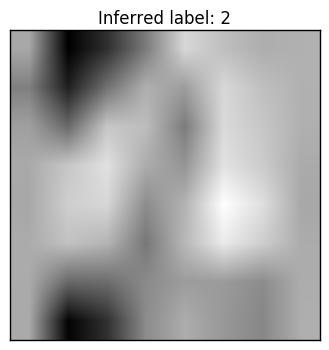

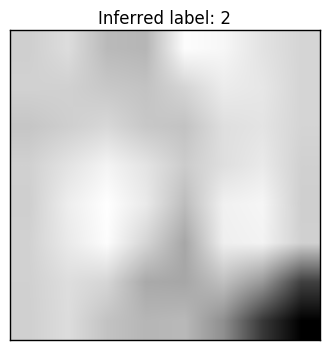

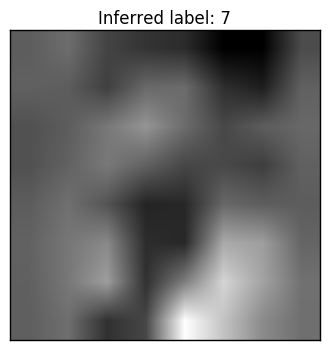

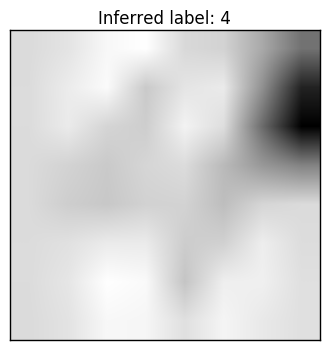

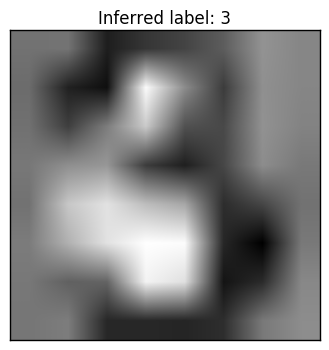

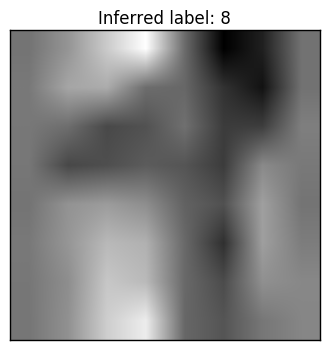

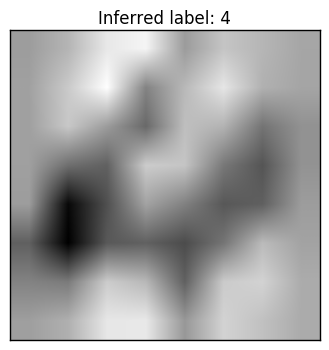

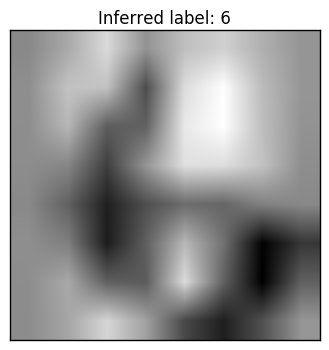

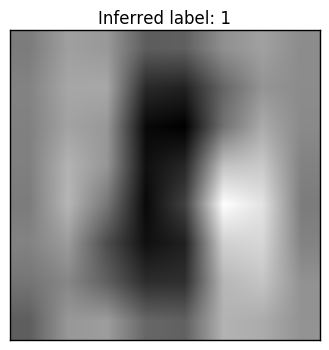

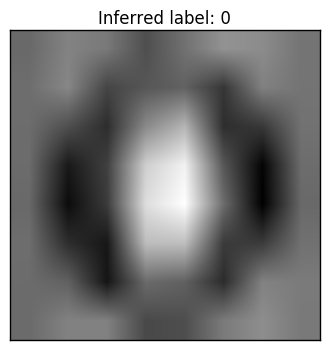

In [218]:
for x in labelled_centroids:
    display_digit(x, title=x[0])

In [220]:
'''twos = []
frequency = {x:0 for x in range(10)}

for (label,digit) in validation:
    inferred_label = classify_digit(digit, labelled_centroids)
    if inferred_label==2:
        twos.append(digit)
        frequency[label] +=1

In [224]:

#df = pandas.DataFrame(twos, frequency)
#df.head()

![Thank you.jpg](Images/Thank you.jpg)

#### References:
#### 1- https://goo.gl/W7TSsx 
#### 2- https://goo.gl/34Nby2
#### 3- https://goo.gl/YJVJmW